In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn 
from sklearn.cluster import KMeans # Here you import the kmeans algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib
from sklearn.preprocessing import StandardScaler

In [3]:
# Define path
path = r'/Users/Shikongo/Healthcare Cost Analysis and Prediction/'

In [4]:
path

'/Users/Shikongo/Healthcare Cost Analysis and Prediction/'

In [8]:
df_insurance = pd.read_csv(r'/Users/Shikongo/Healthcare Cost Analysis and Prediction/Healthcare Clean Data/ Clean Data/insurance2.csv',index_col = False)

In [9]:
df_insurance.to_csv(os.path.join(path,'Healthcare Clean Data',' Clean Data','insurance_Unsupervised.csv'))

In [11]:
df_insurance.head()

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Age,Sex,BMI,Children,Smoker,Region,Charges
0,0,0,0,0,0,0,19,female,27.900,0,yes,southwest,$16884.924000
1,1,1,1,1,1,1,18,male,33.770,1,no,southeast,$1725.552300
2,2,2,2,2,2,2,28,male,33.000,3,no,southeast,$4449.462000
3,3,3,3,3,3,3,33,male,22.705,0,no,northwest,$21984.470610
4,4,4,4,4,4,4,32,male,28.880,0,no,northwest,$3866.855200


In [12]:
# Check the columns before removal
print("Columns before removal:", df_insurance.columns)

Columns before removal: Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', 'Age', 'Sex', 'BMI', 'Children', 'Smoker',
       'Region', 'Charges'],
      dtype='object')


In [13]:
# Drop the specified columns
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0']
df_insurance.drop(columns=columns_to_drop, errors='ignore', inplace=True)

In [14]:
# Check the columns after removal
print("Columns after removal:", df_insurance.columns)

Columns after removal: Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Age',
       'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Charges'],
      dtype='object')


In [15]:
df_insurance['Charges'] = df_insurance['Charges'].replace('[\$,]', '', regex=True).astype(float)

In [16]:
# Create new variable with values 1 = Female & 0 = Male
df_insurance['Sex_Dummy'] = pd.get_dummies(df_insurance['Sex'])['female']

In [17]:
# Create new variable with values 1 = Female & 0 = Male
df_insurance['Smoker_Dummy'] = pd.get_dummies(df_insurance['Smoker'])['yes']

In [18]:
df_insurance.head()

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Age,Sex,BMI,Children,Smoker,Region,Charges,Sex_Dummy,Smoker_Dummy
0,0,0,0,0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,1,1,1,1,18,male,33.770,1,no,southeast,1725.55230,0,0
2,2,2,2,2,28,male,33.000,3,no,southeast,4449.46200,0,0
3,3,3,3,3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,4,4,4,4,32,male,28.880,0,no,northwest,3866.85520,0,0


In [19]:
# Delete string variables as not able to convert to float

In [20]:
# Delete Sex
df_insurance.drop('Sex', axis=1, inplace=True)

In [21]:
# Delete Smoker
df_insurance.drop('Smoker', axis=1, inplace=True)

In [22]:
# Delete Region
df_insurance.drop('Region', axis=1, inplace=True)

In [23]:
df_insurance.head()

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Age,BMI,Children,Charges,Sex_Dummy,Smoker_Dummy
0,0,0,0,0,19,27.900,0,16884.92400,1,1
1,1,1,1,1,18,33.770,1,1725.55230,0,0
2,2,2,2,2,28,33.000,3,4449.46200,0,0
3,3,3,3,3,33,22.705,0,21984.47061,0,0
4,4,4,4,4,32,28.880,0,3866.85520,0,0


1. Create a standardized

In [24]:

# Create a StandardScaler object
scaler = StandardScaler()

# Assuming df_insurance contains your data
df_standardized = df_insurance.copy()

# Select only the numeric columns for standardization
numeric_columns = df_standardized.select_dtypes(include=['float64', 'int64']).columns

# Standardize the selected columns
df_standardized[numeric_columns] = scaler.fit_transform(df_insurance[numeric_columns])


2. Elbow technique

In [25]:
# Apply k-mean algorithm 
num_cl = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [26]:
# Create a score
score = [kmeans[i].fit(df_standardized).score(df_standardized) for i in range(len(kmeans))]

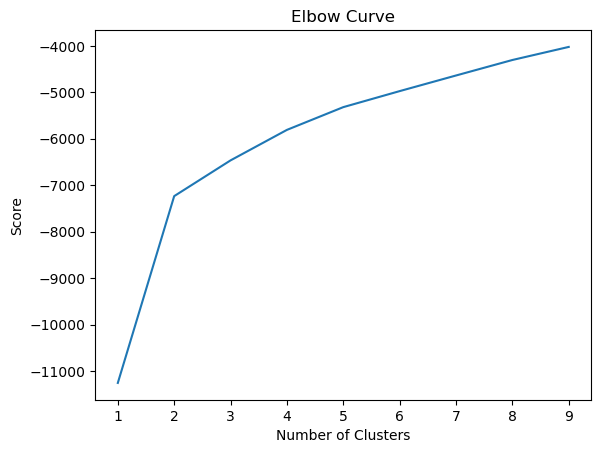

In [27]:
# Plot the elbow curve using PyLab
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

2. Make an informed decision about the number of clusters you'll use in the k-means algorithm based on the chart.

The optimal number of clusters for the k-means algorithm, based on the provided information chart, is 4. This choice is justified by observing the pattern in the chart, where the score initially increases with the number of clusters, reaching a peak improvement between two and four clusters. However, beyond four clusters, the increase in score becomes marginal, indicating diminishing returns. Therefore, 4 clusters represent the point where the curve begins to flatten out, making it the optimal count for capturing meaningful patterns in the data while avoiding unnecessary complexity.

3. Run the k-means algorithm

In [28]:
# k-Means Clustering
# Now know the optimal number of clusters, I can run algorithm.
# First I create the k-means objects
kmeans = KMeans(n_clusters=4)

In [29]:
# After create k-means I fit the dataframe.
# Fit the k-means object to the data
kmeans.fit(df_standardized)

KMeans(n_clusters=4)

4. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. Allow create a visualization using your clusters.

In [30]:
# Assign clusters to original dataframe
df_insurance['clusters'] = kmeans.fit_predict(df_standardized)

In [31]:
# Check how many obsverations fall into each cluster via the value_counts()
df_insurance['clusters'].value_counts()

2    410
0    402
1    399
3    127
Name: clusters, dtype: int64

5. Create a few different visualizations (e.g., scatterplots) using your clustered data

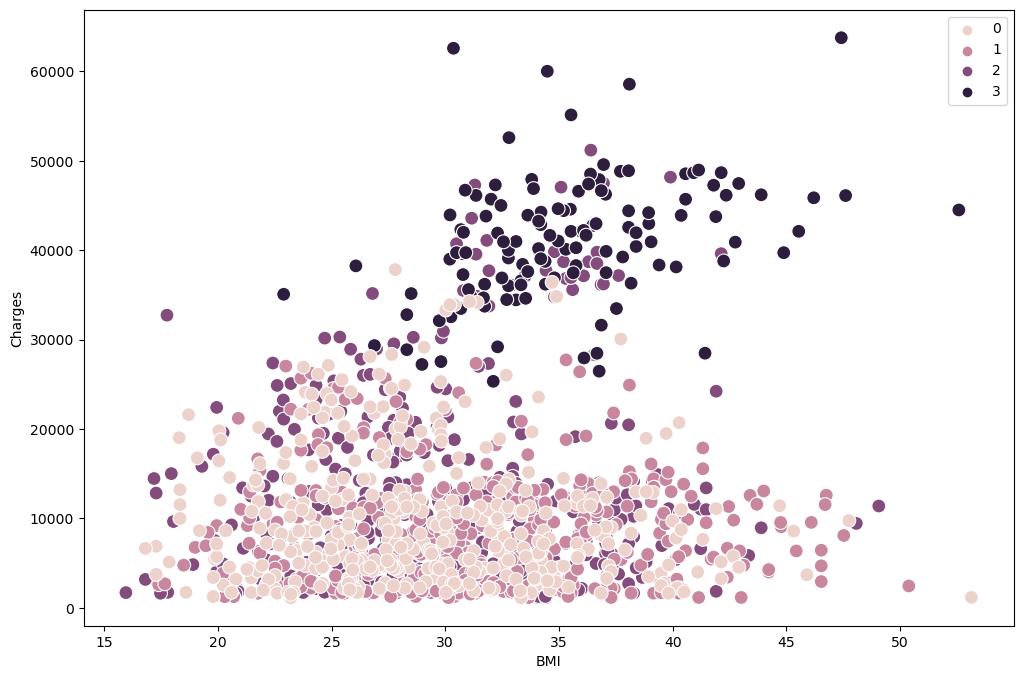

In [32]:
# Plot the cluster for Charges and BMI
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_insurance ['BMI'],y=df_insurance['Charges'], hue=kmeans.labels_, s=100)
# Here, I am subsetting 'x' for the x and y arguments to avoid using thier labels.
# Hue takes the value of the attribute kmeans.lables_, which is the result of running the k-means algorithm.
# S represents the size of the points I want to see in the plot.
ax.grid(False) # This removes the grid from the background
plt.xlabel('BMI') # Label x-axis.
plt.ylabel('Charges') # Label y-axis
plt.show()

6. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

Pink (code 0) data points are tightly clustered with low charges, typically below $1000, across BMI values from 20 to 45. This cluster seems to represent a group with generally low medical charges across those with BMI values from 20 to 45.

Purple (code 2) the clusters are tightly similar with the same BMI values as code 0, but the difference is that the charges are higher than code 0, ranging from over $10,000. This cluster seems to represent a group with moderate to high medical charges.

Dark Purple (code 3) the cluster is tightly together between 25 to 30 BMI, while between 20 and 35 to 40 there is a cluster, but not tightly, and over 40 BMI, there is no dark purple cluster. This means that the majority with BMI from 25 to 30 have moderately high charges compared to other BMI values.

Red (code 1) the clusters are tightly together between 35 to 45 BMI with extremely high charges ranging from $30,000 to $50,000.

In summary, the clusters make sense as they seem to capture distinct patterns in the data related to BMI and medical charges. The separation into low, moderate/high, and higher BMI with varying charge levels aligns with the expected behavior in a k-means clustering scenario.

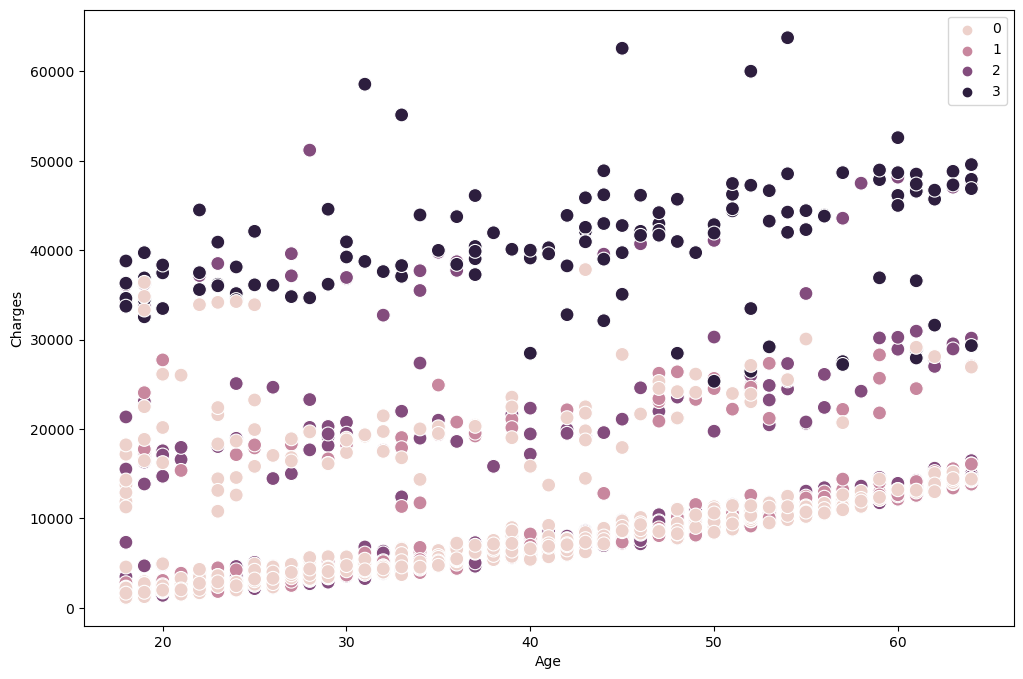

In [33]:
# Plot the cluster for another variables: Age and Charges
plt.figure(figsize=(12, 8))
as_plot = sns.scatterplot(x=df_insurance['Age'], y=df_insurance['Charges'], hue=kmeans.labels_, s=100)
as_plot.grid(False)  # Use as_plot instead of ax
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [34]:
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

7. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

Pink (code 0) clusters are tightly together from age 20 to 40, and they line up going up from 20 years to 40 years. Similarly, red (code 2) clusters are tightly together from 50 to 60 but line up going up. It means that the more you age, the more the charges. At age 20, there are very low charges compared to 60 years old. Charges range from $0 to $1000.

Dark Purple (code 3) and red (code 1) clusters are closely tied together and also represented in a linear style. Dark Purple and red clusters also demonstrate that as you age, the charges increase. With these clusters, the charges start at a young age with low charges and increase at the older age. For instance, in Dark Purple, the charges for 20-year-old people are around $20,000, and for 60 years old, it's close to $30,000. Similar to pink, the charges for 20-year-old people are around $30,000, and for 60 years old, it's close to $50,000.

Regarding the observations for the codes, the trend shows that with more age, the data points go up, aligning with the visual representation of the clusters. This pattern indicates that, on average, as age increases, there is an upward trend in charges within these clusters. Overall, the clusters make sense in capturing different age groups with distinct patterns in charges.

8. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings

In [35]:
# Check/calculate the descriptive statistics group by BMI, Age, and Charges
grouped_data = df_insurance.groupby('clusters').agg({'BMI': ['mean', 'median'], 'Age':['mean', 'median'], 'Charges':['mean', 'median']})


In [36]:
cluster_mapping = {0: 'cluster A', 1: 'cluster B', 2: 'cluster C', 3: 'cluster D'}
grouped_data = grouped_data.rename(index=cluster_mapping)

In [37]:
grouped_data.assign()

BMI               Age              Charges            
                mean median       mean median          mean      median
clusters                                                               
cluster A  29.061219  28.29  37.355721   37.0   9974.724801   8273.2835
cluster B  31.540990  31.10  40.107769   41.0   8792.029143   8083.9198
cluster C  29.912585  29.70  39.021951   39.0  12268.693341   9273.6388
cluster D  35.401575  34.80  42.834646   44.0  41006.312779  40941.2854

In [38]:
grouped_data.replace({'clusters': {0: 'light pink', 1: 'pink', 2: 'purple', 3: 'dark purple'}})

BMI               Age              Charges            
                mean median       mean median          mean      median
clusters                                                               
cluster A  29.061219  28.29  37.355721   37.0   9974.724801   8273.2835
cluster B  31.540990  31.10  40.107769   41.0   8792.029143   8083.9198
cluster C  29.912585  29.70  39.021951   39.0  12268.693341   9273.6388
cluster D  35.401575  34.80  42.834646   44.0  41006.312779  40941.2854

8. Propose what these results could be useful for in future steps of an analytics pipeline


The results, can be valuable for various aspects of an analytics pipeline, particularly in the context of insurance or healthcare analytics. Here are some potential uses:

Segmentation Analysis:

Identifying Customer Segments: The clusters can represent different segments of customers based on their characteristics such as BMI, age, and charges. Understanding the characteristics of each segment helps in tailoring products, services, or marketing strategies to better meet the needs of specific customer groups.

Risk Profiling:

Insurance Risk Assessment: Analyzing the mean and median values for charges in each cluster can provide insights into the different risk profiles associated with each group. This information is valuable for insurance companies in assessing and pricing risks associated with different customer segments.
Product Development:

Customizing Insurance Products: By understanding the characteristics of each cluster, insurance providers can develop customized insurance products that align with the specific needs and preferences of different customer segments.
Marketing Strategy:

Targeted Marketing Campaigns: The information can be used to design targeted marketing campaigns for specific clusters. For example, if a cluster has a higher average age, marketing efforts could be tailored to address the healthcare needs associated with that age group.
Operational Efficiency:

Resource Allocation: Understanding the distribution of BMI, age, and charges within each cluster helps in resource allocation and planning. For instance, clusters with higher average charges may require additional resources for claims processing.
Customer Engagement:

Customer Communication: The analytics results can be used to communicate with customers more effectively. For example, providing health and wellness tips to clusters with certain BMI or age characteristics can improve customer engagement.
Predictive Modeling:

Future Predictions: The cluster characteristics can be input features for predictive modeling. For instance, predicting future charges or healthcare utilization based on the observed patterns within each cluster.

Benchmarking:
Comparing Performance: The mean and median values within each cluster can serve as benchmarks for evaluating the performance of insurance products or services over time. This helps in assessing whether improvements are being made for each customer segment.

Understanding the unique characteristics of each cluster is crucial for making informed decisions in subsequent steps of the analytics pipeline. The results serve as a foundation for strategic planning, decision-making, and optimization of various aspects within the insurance or healthcare domain.



In [43]:
df_insurance.to_csv(os.path.join(path,'Healthcare Clean Data',' Clean Data','insurance_Unsupervised.csv'))

In [40]:
df_insurance

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Age,BMI,Children,Charges,Sex_Dummy,Smoker_Dummy,clusters
0,0,0,0,0,19,27.900,0,16884.92400,1,1,2
1,1,1,1,1,18,33.770,1,1725.55230,0,0,2
2,2,2,2,2,28,33.000,3,4449.46200,0,0,2
3,3,3,3,3,33,22.705,0,21984.47061,0,0,2
4,4,4,4,4,32,28.880,0,3866.85520,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,1333,1333,1333,50,30.970,3,10600.54830,0,0,0
1334,1334,1334,1334,1334,18,31.920,0,2205.98080,1,0,0
1335,1335,1335,1335,1335,18,36.850,0,1629.83350,1,0,0
1336,1336,1336,1336,1336,21,25.800,0,2007.94500,1,0,0
